In [4]:
import numpy as np
import matplotlib.pyplot as plt

Naive Method(Problem 1)

In [2]:
# x, y pair
data_point = [(0, 3), (5, 8), (10, -2), (15, 9)]
data_x = [data_point[i][0] for i in range(len(data_point))]
data_y = [data_point[i][1] for i in range(len(data_point))]

In [5]:
#find the coefficients of the polynomial

def naive_interpolation(x, y):
    '''
        x: list of x values
        y: list of y values
        co_eff: list of coefficients of the polynomial
    '''
    #set up the Vandermonde matrix
    n = len(x) #get the length of x values
    V = np.zeros((n, n)) #Initialize the vandermonde matrix. np.zeros(n, n) => n x n matrix with zeros!
    for i in range(n):
        for j in range(n):
            V[i][j] = x[i] ** j #fill in the vandermonde matrix with x values raised to the power of j
    co_eff = np.linalg.solve(V, y) #calculate the coefficients. (ax = b) using numpy linear algebra solver
    return co_eff

#print the coefficients from naive interpolation

co_eff = naive_interpolation(data_x, data_y)
print(co_eff)

[ 3.     4.9   -1.02   0.048]


In [6]:
#Write the function to evaluate the polynomial. a is the coefficients array, and x is ghe point to evaluate.
#You can't use the built-in 'polyval' function here, but I recommend using it to check if yourcode is correct.


def my_poly_eval(a, x):
    '''
        a: coefficients of the polynomial
        x: point to evaluate
    '''
    n = len(a) #get the length of the coefficients
    y = 0
    for i in range(n):
        y += a[i] * (x ** i) #evaluate the polynomial
    return y

#check my_poly_eval function with the built-in polyval function

print(my_poly_eval(co_eff, 5)) #ascending order (coefficients)

print(np.polyval(co_eff[::-1], 5)) #descedning order (coefficients) -> That's the reason why I reversed the coefficients array.

#Evaluate the polynomials at points x = [0: .5: 15], and plot the curve.
eval_x = np.arange(0, 15.5, 0.5) #generate the x values from 0 to 15 with 0.5 step size

#evaluate the polynomial at the given x values
eval_y = [my_poly_eval(co_eff, x) for x in eval_x]
for i in range(len(eval_x)):
    print(eval_y[i])

8.0
8.0
3.0
5.2010000000000005
6.928000000000001
8.217000000000002
9.104000000000001
9.625
9.816000000000003
9.713000000000001
9.352
8.768999999999998
8.0
7.081000000000002
6.048000000000007
4.937000000000003
3.783999999999999
2.625
1.4960000000000022
0.43299999999999983
-0.5280000000000058
-1.350999999999999
-2.0
-2.438999999999993
-2.631999999999998
-2.5430000000000206
-2.1359999999999815
-1.375
-0.22399999999998954
1.3529999999999944
3.391999999999996
5.929000000000002
9.0


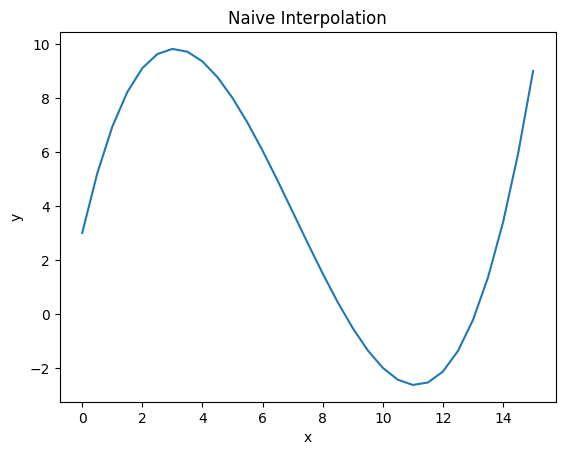

<Figure size 640x480 with 0 Axes>

In [8]:
#plot the curve using matplotlib
plt.plot(eval_x, eval_y)
# plt.show()
plt.title('Naive Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('naive_interpolation.png')
plt.show()
plt.clf()

Problem2. The Lagrange Method

In [9]:
#langrange polynomials. Using the same data set, write a function that return the polynomials using the Lagrange algorithm.

#return the polynomial
def my_langrange(x, y, x_val):
    '''
        x: list of x values
        y: list of y values
        x_val: point to evaluate
    '''
    n = len(x) #get the length of x values
    y_val = 0
    for i in range(n):
        l = 1
        for j in range(n):
            if i != j:
                l *= (x_val - x[j]) / (x[i] - x[j]) #calculate the lagrange polynomial
        y_val += l * y[i] #evaluate the lagrange polynomial
    return y_val

lagrange_poly = my_langrange(data_x, data_y, 5) # 
print(lagrange_poly)

#Use the same data set, and code Newton's divided difference.

8.0


In [11]:
''' Problem 3. Newton's Divided Difference Method'''

def newton_divided_difference(x, y):
    '''
    Calculates the coefficients of the Newton polynomial using divided differences.

    x: list of x values
    y: list of y values
    Returns: list of coefficients of the polynomial
    '''
    n = len(x)
    F = np.zeros((n, n))
    for i in range(n):
        F[i][0] = y[i]
    for i in range(1, n):
        for j in range(1, i + 1):
            F[i][j] = (F[i][j - 1] - F[i - 1][j - 1]) / (x[i] - x[i - j])
    co_eff = [F[i][i] for i in range(n)]
    return co_eff


def newton_polynomial(co_eff, x_values, x):
    '''
    Evaluates the Newton polynomial at a given x.

    co_eff: coefficients of the Newton polynomial
    x_values: original x values used to generate the polynomial
    x: point at which to evaluate the polynomial
    Returns: y value at the given x
    '''
    n = len(x_values)
    result = co_eff[0]
    for i in range(1, n):
        term = co_eff[i]
        for j in range(i):
            term *= (x - x_values[j])
        result += term
    return result

co_effs = newton_divided_difference(data_x, data_y)

eval_y_newton = [newton_polynomial(co_effs, data_x, x) for x in eval_x]
print(eval_y_newton)

[np.float64(3.0), np.float64(5.201), np.float64(6.928), np.float64(8.216999999999999), np.float64(9.104), np.float64(9.625), np.float64(9.815999999999999), np.float64(9.713), np.float64(9.352), np.float64(8.769), np.float64(8.0), np.float64(7.0809999999999995), np.float64(6.048), np.float64(4.937), np.float64(3.784), np.float64(2.625), np.float64(1.4960000000000004), np.float64(0.4330000000000007), np.float64(-0.5279999999999989), np.float64(-1.351000000000001), np.float64(-2.0), np.float64(-2.438999999999999), np.float64(-2.631999999999997), np.float64(-2.5429999999999975), np.float64(-2.1359999999999957), np.float64(-1.375), np.float64(-0.2240000000000002), np.float64(1.3530000000000015), np.float64(3.391999999999996), np.float64(5.929000000000009), np.float64(9.0)]
